In [3]:
import csv
# import pandas module 
import pandas as pd 
import datatable as dt
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [10]:
print(0)
df_profiles = dt.fread(r"instagram_profiles.csv", sep= '\t').to_pandas()
print(1)
df_locations = dt.fread(r"instagram_locations.csv", sep= '\t' ).to_pandas()
print(2)
df_posts_3 = dt.fread(r"instagram_posts.csv", sep= '\t', columns = {'sid_profile', 'profile_id', 'cts'}).to_pandas()




0
1
2
ok


In [11]:
#3.1


d = {} #dictionary containing occurencies for each cts on posts


for i in range(len(df_posts_3)): #create dictionary with time occurrencies
    
    hour = str(df_posts_3['cts'][i])[11:]
    
    if hour in d:
        d[hour]+=1
    else:
        d[hour]=1
    


0


In [12]:
#3.1


print('The most common time in which users publish their posts is ' + str(max(d, key=d.get)) + ', with ' + str(d[max(d, key=d.get)]) + ' occurencies')



The most common time in which users publish their posts is , with 3332 occurencies


In [13]:
#3.2

#SUPPOSING THAT EVERY TIME INTERVAL IN THE LIST IS WRITTEN IN THE FORMAT 'hh:mm:ss-hh:mm:ss'
#this function uses the dictionary previously created

def plot_posts_time_intervals(time_intervals=[], d_datas={}):
    
    if ('' in d):
        d.pop('',None)
    
    posts_count = [] #counter for posts in each time interval
    
    for interval in time_intervals:
        
        i_count=0
        
        h1=int(interval[:2]) #split interval margins into integers
        m1=int(interval[3:5])
        s1=int(interval[6:8])
        h2=int(interval[9:11])
        m2=int(interval[12:14])
        s2=int(interval[15:])
        

        
        for key in d_datas:
            
            
            k_h=int(key[:2]) #split time into integers
            k_m=int(key[3:5])
            k_s=int(key[6:8])
            
            if (h1 <=k_h and m1<=k_m and s1<=k_s and h2>=k_h and m2>=k_m and s2>=k_s): #if time is in the given interval
                
                i_count+=d[key] #increment posts on that interval for this specific time
            
        
        
        posts_count.append(i_count)
        
    print(posts_count)
    plt.title('Number of Posts')
    plt.xlabel('Time')
    plt.ylabel('Posts')
    plt.plot(time_intervals, posts_count)

    plt.show()
                

[6378572, 5614715, 6763037, 7409907, 8915794, 4213617, 3411223]


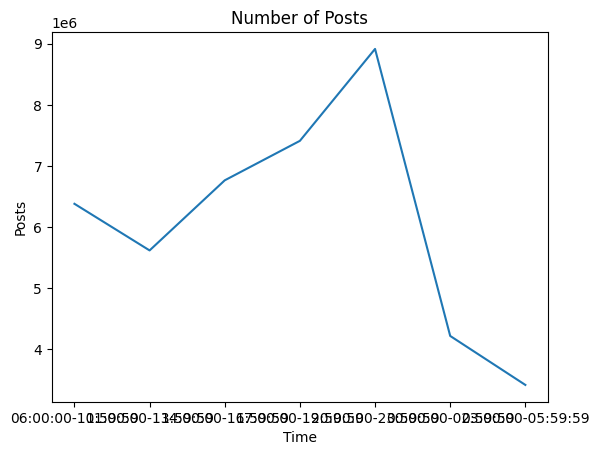

In [14]:
#3.3

times = ["06:00:00-10:59:59","11:00:00-13:59:59", "14:00:00-16:59:59","17:00:00-19:59:59","20:00:00-23:59:59","00:00:00-02:59:59","03:00:00-05:59:59"]

plot_posts_time_intervals(times,d)

plt.show()
